In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pl

<IPython.core.display.Javascript object>


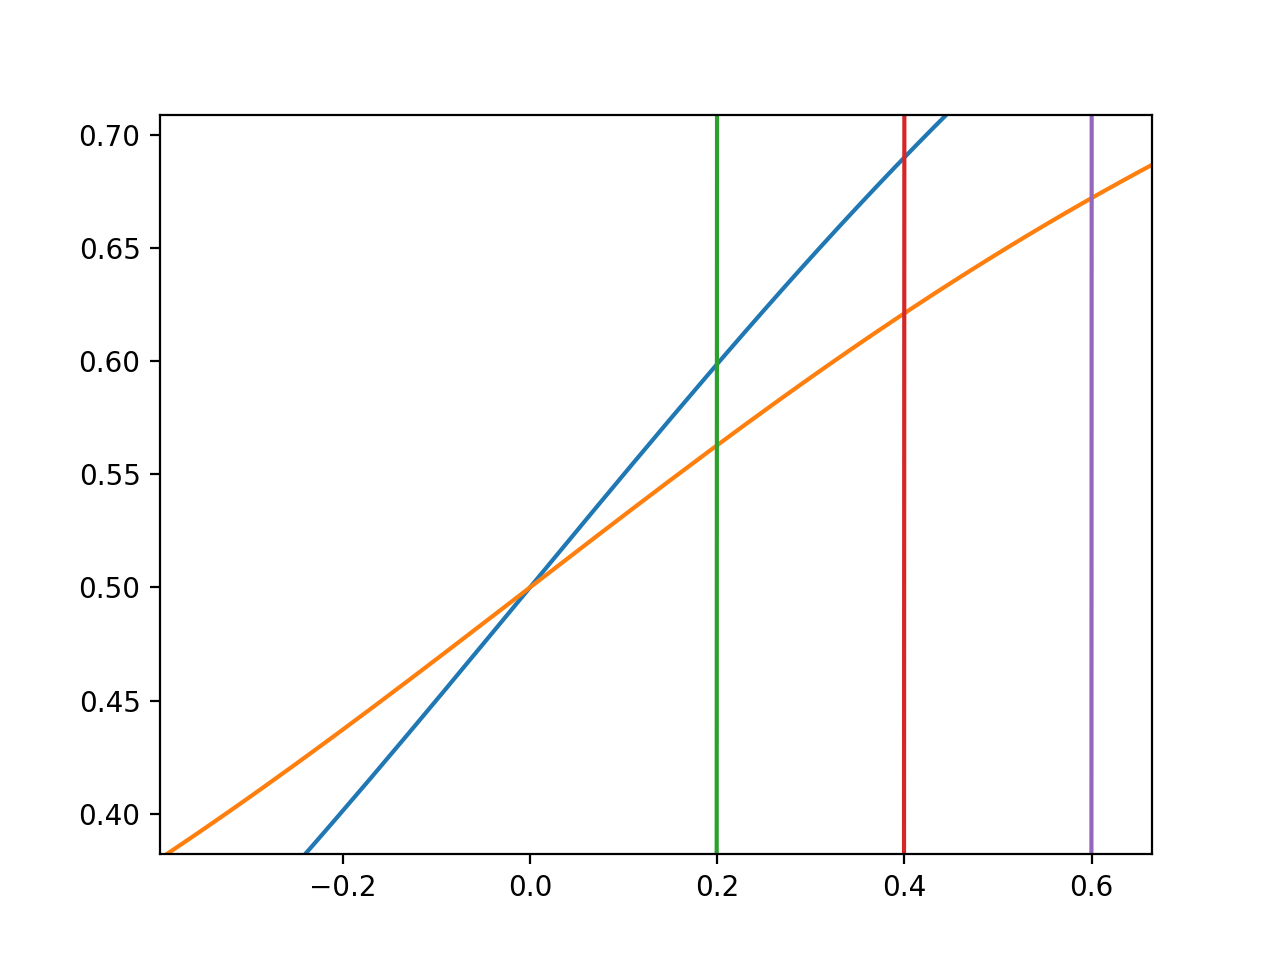

In [16]:
x = np.linspace(-10,10,1000)
y = np.tanh(x)
y2 = np.arctan(x)
pl.plot(x,0.5*(y+1))
pl.plot(x,(y2+np.pi/2)/np.pi)

In [163]:
def get_A1(A2,xw):
    return - (A2*(xw-1) + 1) / xw
def get_A2(xw):
    return - ( 2 + 1/xw ) / ( (xw-1)/xw - (xw-1)**2 ) 

def fisheye(x,xw,d):
    #A2 = get_A2(xw)
    #A1 = get_A1(A2,xw)
    X = np.array([[ xw**2/2, ((xw-1)**d)/d], [xw, (xw-1)**(d-1)]])
    print(X)
    b = np.array([xw-1,1])
    A1, A2 = -np.linalg.inv(X).dot(b)
    f1 = lambda x: A1/2 * x**2 + x
    f2 = lambda x: -A2/d * (x-1)**d  + 1
    result = np.ones_like(x)
    result[x<=xw] = f1(x[x<=xw])
    result[x>xw] = f2(x[x>xw])
    return result

<IPython.core.display.Javascript object>


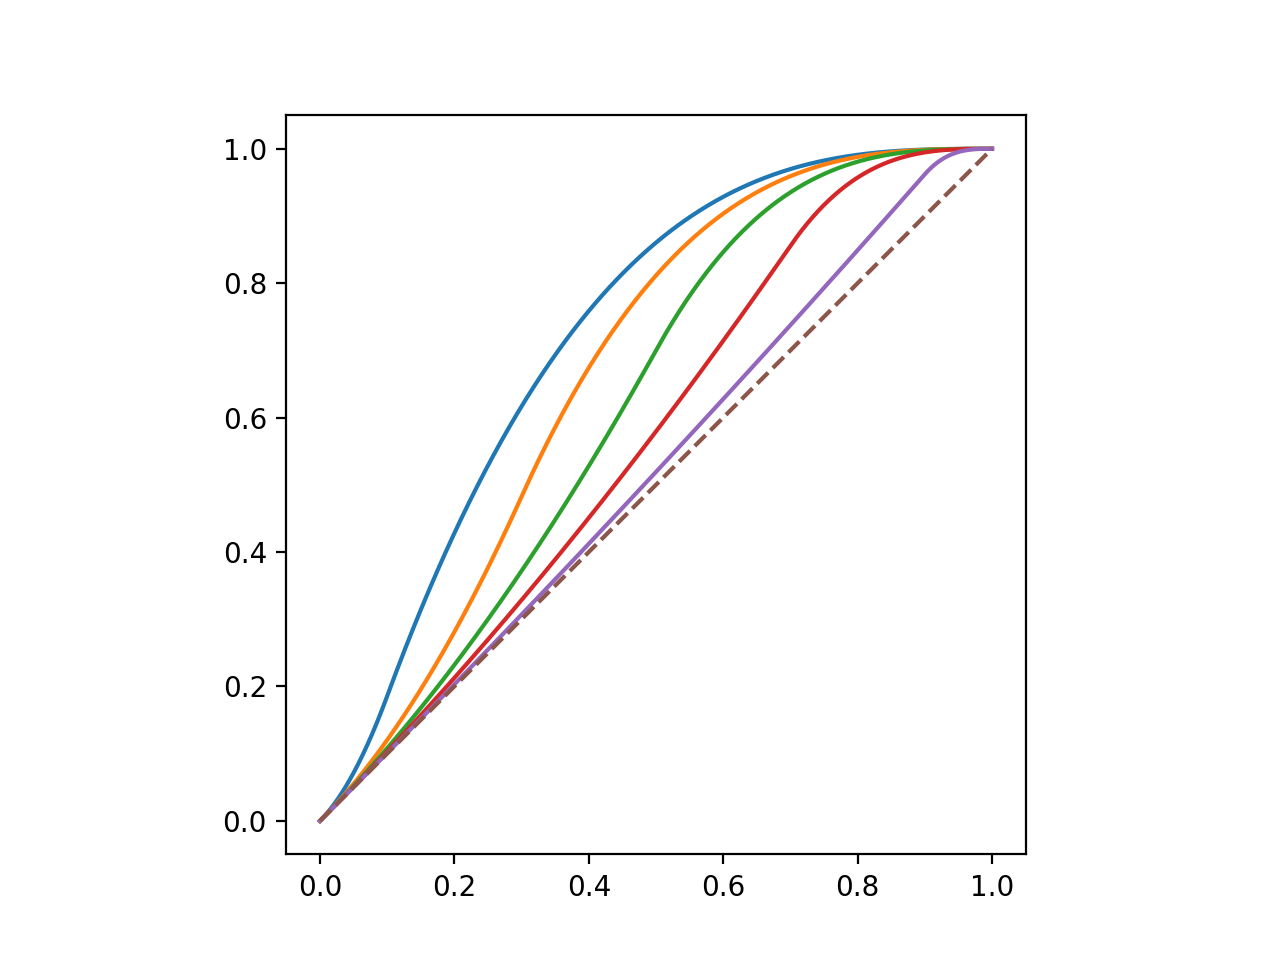

[[ 0.005 -0.243]
 [ 0.1    0.81 ]]
[[ 0.045      -0.11433333]
 [ 0.3         0.49      ]]
[[ 0.125      -0.04166667]
 [ 0.5         0.25      ]]
[[ 0.245 -0.009]
 [ 0.7    0.09 ]]
[[ 4.05000000e-01 -3.33333333e-04]
 [ 9.00000000e-01  1.00000000e-02]]


(-0.05, 1.05, -0.05, 1.05)

In [164]:
x = np.linspace(0,1,1000)
xws = np.linspace(0.1,0.9,5)
pl.figure()
for xw in xws:
    pl.plot(x, fisheye(x,xw,3))
pl.plot(x,x,'--')
pl.axis('square')


In [57]:
xws

[0.3]

<IPython.core.display.Javascript object>


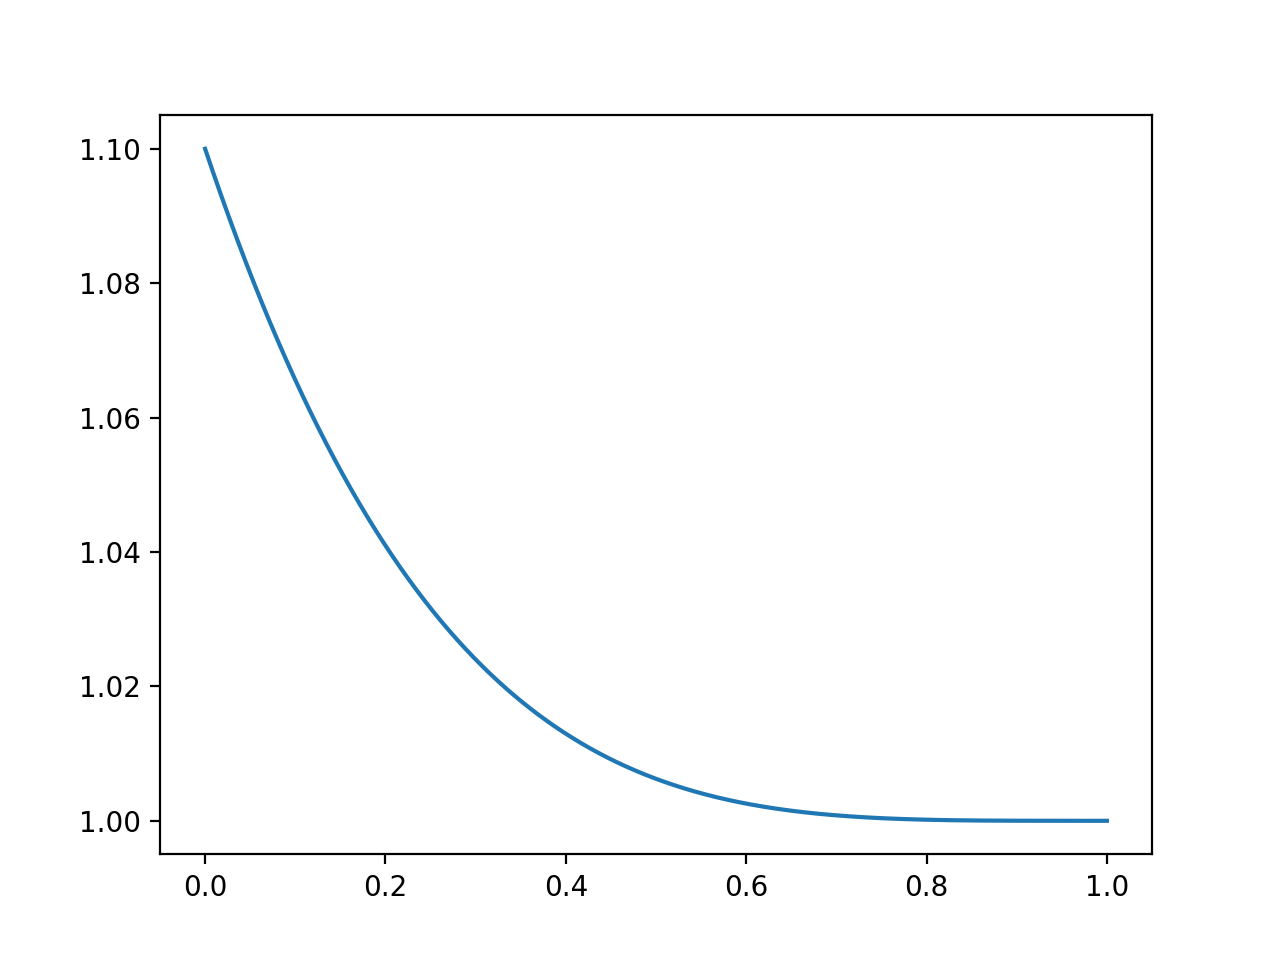

In [73]:
pl.figure()
pl.plot(x,0.1*(1-x)**4+1)

In [126]:
def fisheye(x,d,xw=0.5):

    X = np.array([[ xw**2/2., -0.5*(xw-1)**2], 
                  [ xw, -(xw-1)]])
    b = np.array([xw+1-d*xw**(1./d), 1-xw**(1./d-1)])
    A1, A2 = np.linalg.inv(X).dot(b)
    print(A1,A2)
    f1 = lambda x: x**(1./d) + 0.5*A1*x**2
    f2 = lambda x: A2/2. * (x-1)**2  + x
    result = np.ones_like(x)
    result[x<=xw] = f1(x[x<=xw])
    result[x>xw] = f2(x[x>xw])
    return result


<IPython.core.display.Javascript object>


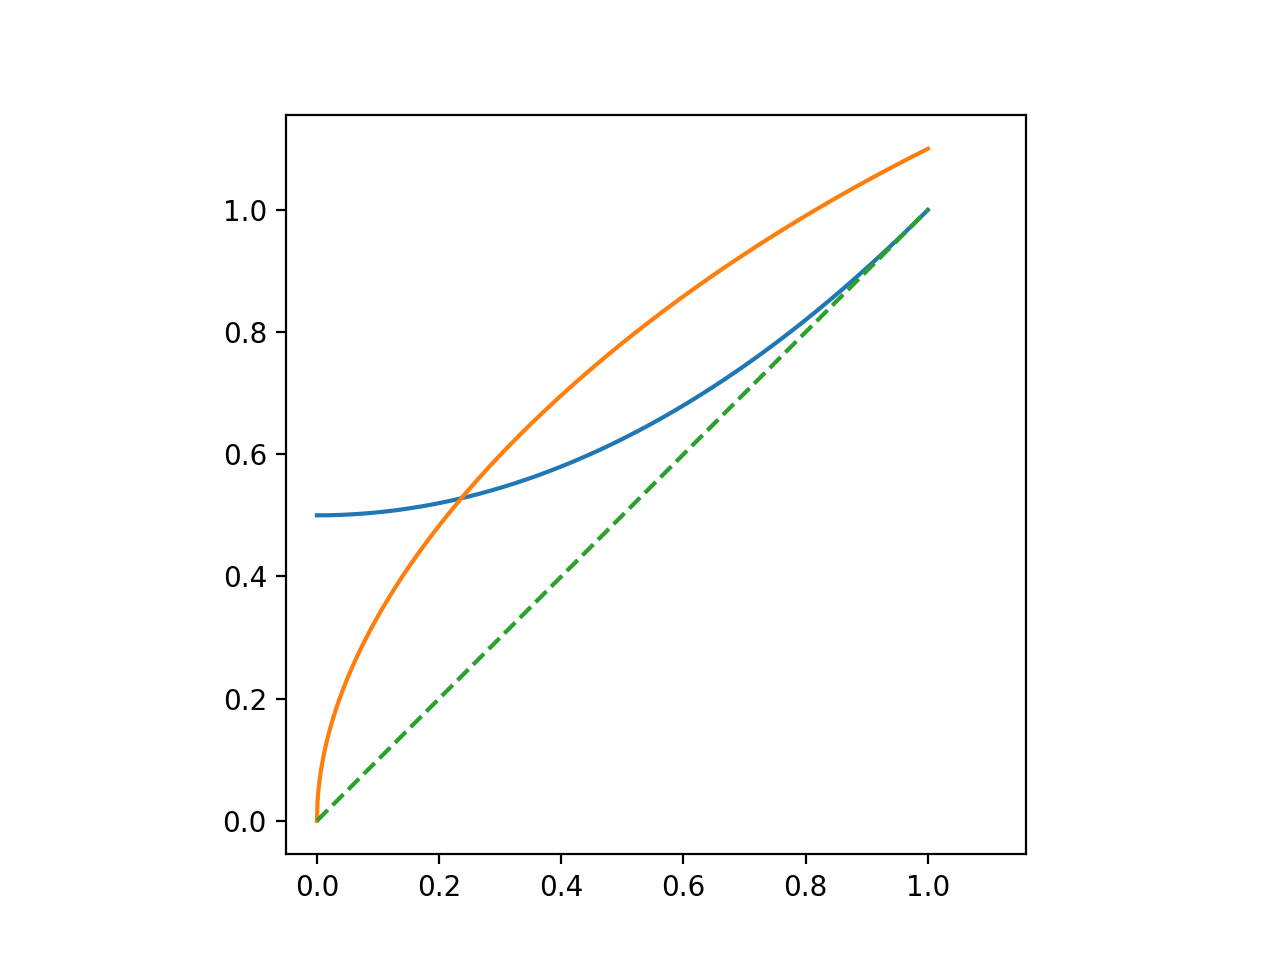

(-0.05, 1.16, -0.05500000000000001, 1.155)

In [153]:
x = np.linspace(0,1,1000)
xws = np.linspace(0.1,0.9,5)
pl.figure()
for xw in xws:
    #pl.plot(x, fisheye(x,2,xw))
    #pl.plot(x,A2/2. * (x-1)**2  + x )
    pass
pl.plot(x,1./2. * (x-1)**2  + x )
pl.plot(x,x**(1./2) - 0.1*((x-1)**2-1))
pl.plot(x,x,'--')
pl.axis('square')

In [117]:
pl.plot(x,0.5*(x-1)**2+x)

<IPython.core.display.Javascript object>


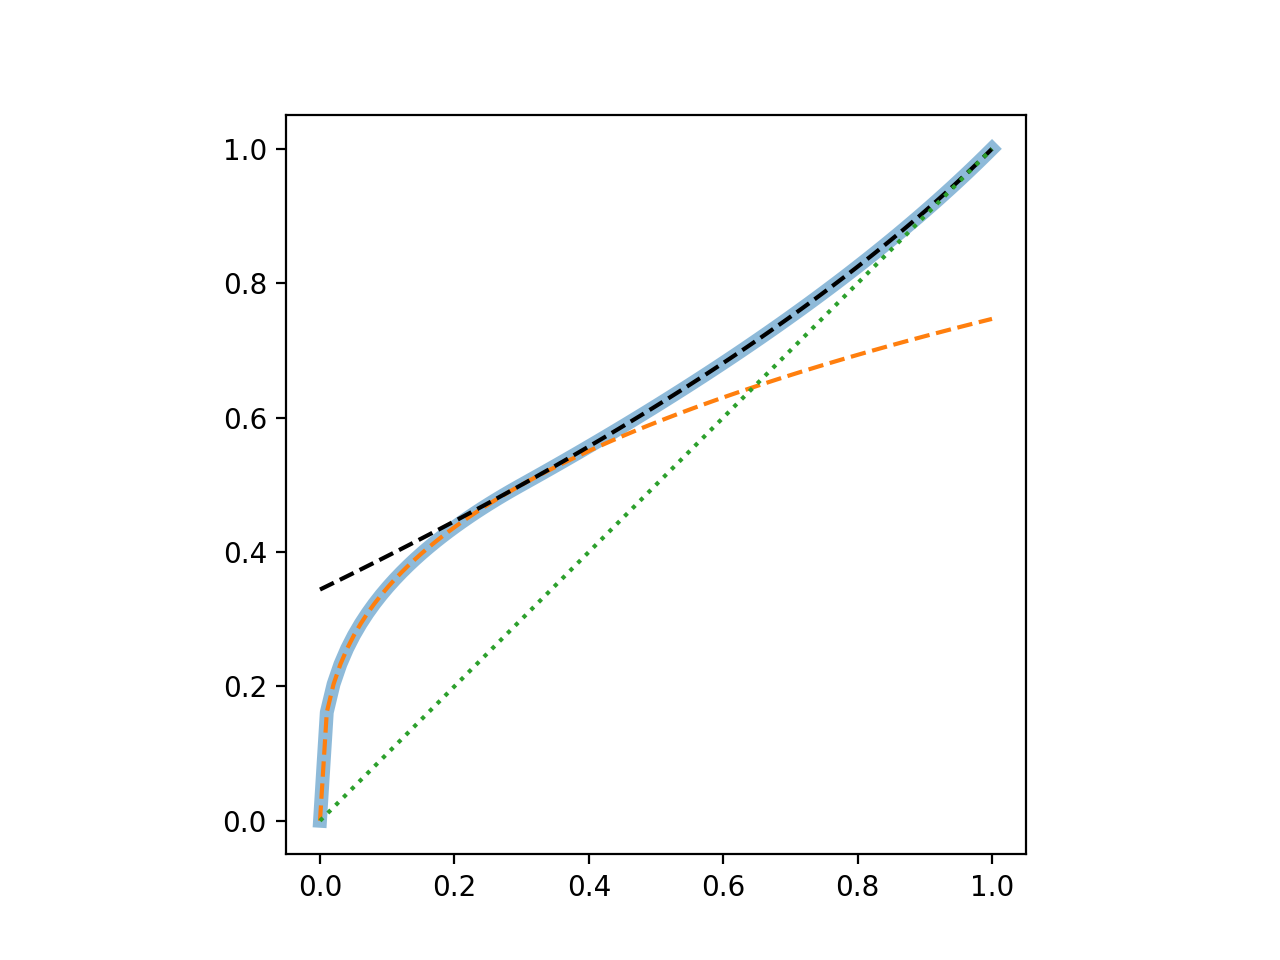

(-0.05, 1.05, -0.05, 1.05)

In [278]:
xw = 0.5
d = 3
X = np.array([[ xw**2/2, ((1-xw)**d)/d], [xw, -(1-xw)**(d-1)]])

b = np.array([xw-1,1])
A1, A2 = -np.linalg.inv(X).dot(b)

x = np.linspace(0,1,100)
xc = A1/2 * xw**2 + xw
xc = 1 - xc

#if A2 < 0:
#    A2 *= -1
f1 = (d/A2*x)**(1./d)
f2 = 1 - (-1./A1 + np.sqrt(1/A1**2 + 2*(1-x)/A1))
result = np.ones_like(x)
result[x<=xc] = f1[x<=xc]
result[x>xc] = f2[x>xc]

pl.figure()
pl.plot(x,result,lw=5,alpha=0.5)
pl.plot(x,f1,'--')
pl.plot(x,f2,'--k')
pl.plot(x,x,':')
pl.axis('square')

In [190]:
x**(1./3)

array([0.        , 0.10003336, 0.12603413, 0.14427306, 0.15879305,
       0.17105463, 0.18177267, 0.19135693, 0.20006671, 0.20807776,
       0.21551533, 0.22247219, 0.22901921, 0.2352119 , 0.24109462,
       0.24670347, 0.25206826, 0.25721393, 0.26216156, 0.26692917,
       0.2715323 , 0.27598444, 0.2802974 , 0.28448156, 0.28854613,
       0.29249931, 0.29634842, 0.30010007, 0.30376018, 0.30733416,
       0.31082689, 0.31424285, 0.31758611, 0.32086042, 0.32406924,
       0.32721574, 0.33030286, 0.33333333, 0.33630968, 0.33923426,
       0.34210926, 0.34493674, 0.34771861, 0.35045666, 0.35315259,
       0.35580797, 0.3584243 , 0.36100298, 0.36354534, 0.36605263,
       0.36852603, 0.37096667, 0.37337562, 0.37575387, 0.37810239,
       0.3804221 , 0.38271385, 0.38497848, 0.38721678, 0.38942949,
       0.39161735, 0.39378102, 0.39592118, 0.39803844, 0.40013342,
       0.40220669, 0.4042588 , 0.40629029, 0.40830166, 0.4102934 ,
       0.412266  , 0.41421989, 0.41615553, 0.41807332, 0.41997

<IPython.core.display.Javascript object>


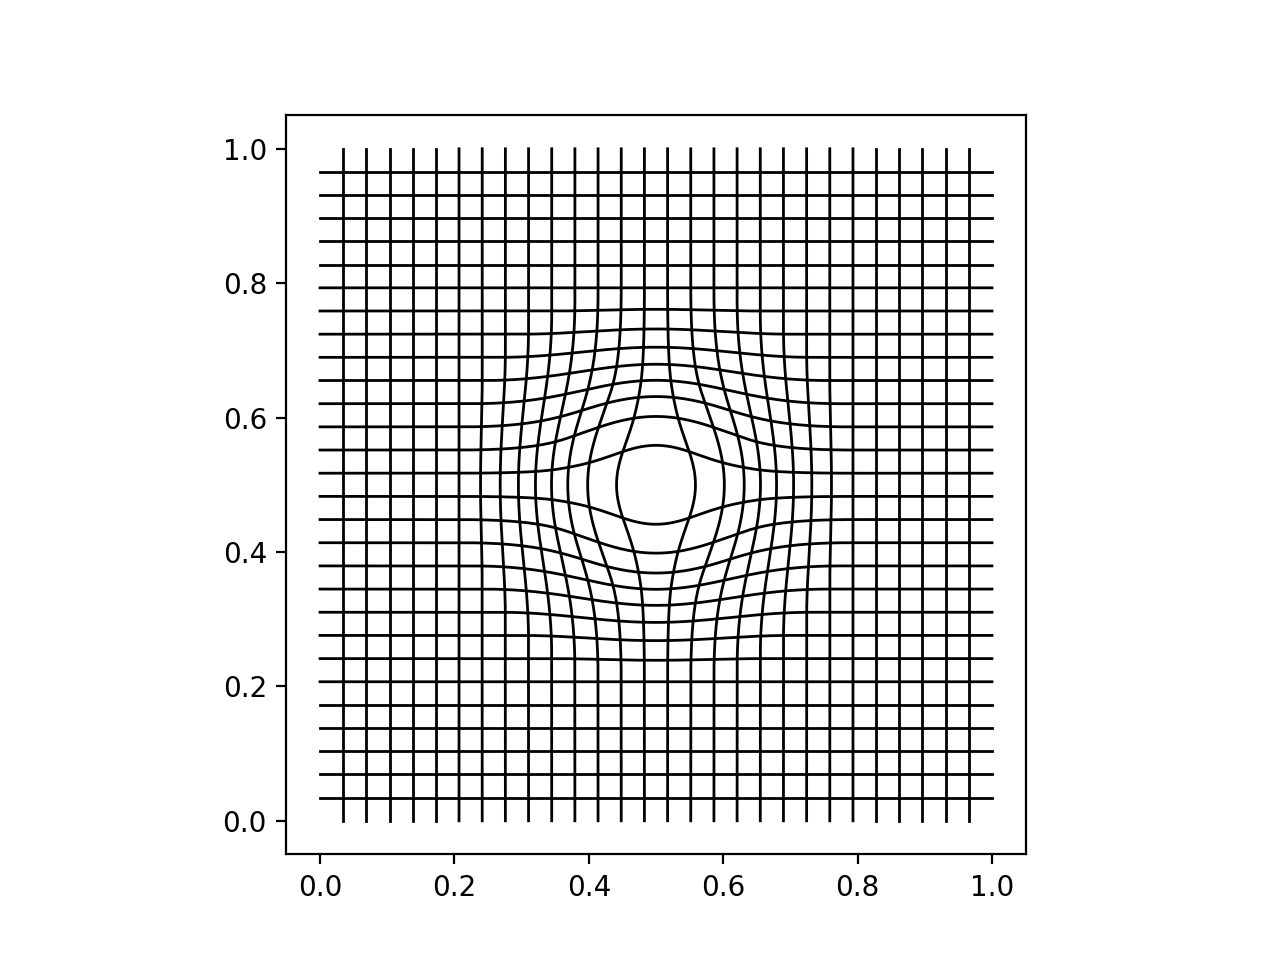

(-0.050000000000000114, 1.05, -0.050000000000000114, 1.05)

In [320]:
xw = 0.5
d = 2
X = np.array([[ xw**2/2, ((1-xw)**d)/d], [xw, -(1-xw)**(d-1)]])

b = np.array([xw-1,1])
A1, A2 = -np.linalg.inv(X).dot(b)

x = np.linspace(0,1,100)
xc = A1/2 * xw**2 + xw
xc = 1 - xc

#if A2 < 0:
#    A2 *= -1
def fisheye_raw(x):
    f1 = (d/A2*x)**(1./d)
    f2 = 1 - (-1./A1 + np.sqrt(1/A1**2 + 2*(1-x)/A1))

    if hasattr(x,'__len__'):
        result = np.ones_like(x)
        result[x<=xc] = f1[x<=xc]
        result[x>xc] = f2[x>xc]
    else:
        if x<=xc:
            return f1
        else:
            return f2
    return result

def fisheye(x,focusX,R):
    dx = x - focusX
    
    if dx == 0 or dx > R:
        return x
    
    rescaled = np.abs(dx) / R
    return focusX + R * np.sign(dx) * fisheye_raw(rescaled)
    
def fisheye_radial(x,focus,R):
    dx = x[0] - focus[0]
    dy = x[1] - focus[1]
    theta = np.arctan2(dy, dx)
    dr = np.sqrt(dx**2+dy**2)
    newx = [0,0]
    f_eye = fisheye(dr, 0, R)
    newx[0] = focus[0] + f_eye * np.cos(theta)
    newx[1] = focus[1] + f_eye * np.sin(theta)
    return newx
    
pl.figure()
N = 29
R = 0.3
dx = 1.0 / N
dir1 = np.linspace(0,1,1000)

for i in range(1,N):    
    dir2 = np.ones_like(dir1) * dx * i
    # x - direction
    new_x, new_y = [], []
    for x, y in zip(dir1, dir2):
        _newx, _newy = fisheye_radial((x,y), (0.5,0.5
                                            ), R)
        new_x.append(_newx)
        new_y.append(_newy)
        
    pl.plot(new_x, new_y,'-k',lw=1)
    pl.plot(new_y, new_x,'-k',lw=1)

#pl.plot(x,result,lw=5,alpha=0.5)
#pl.plot(x,f1,'--')
#pl.plot(x,f2,'--k')
#pl.plot(x,x,':')
pl.axis('square')

<IPython.core.display.Javascript object>


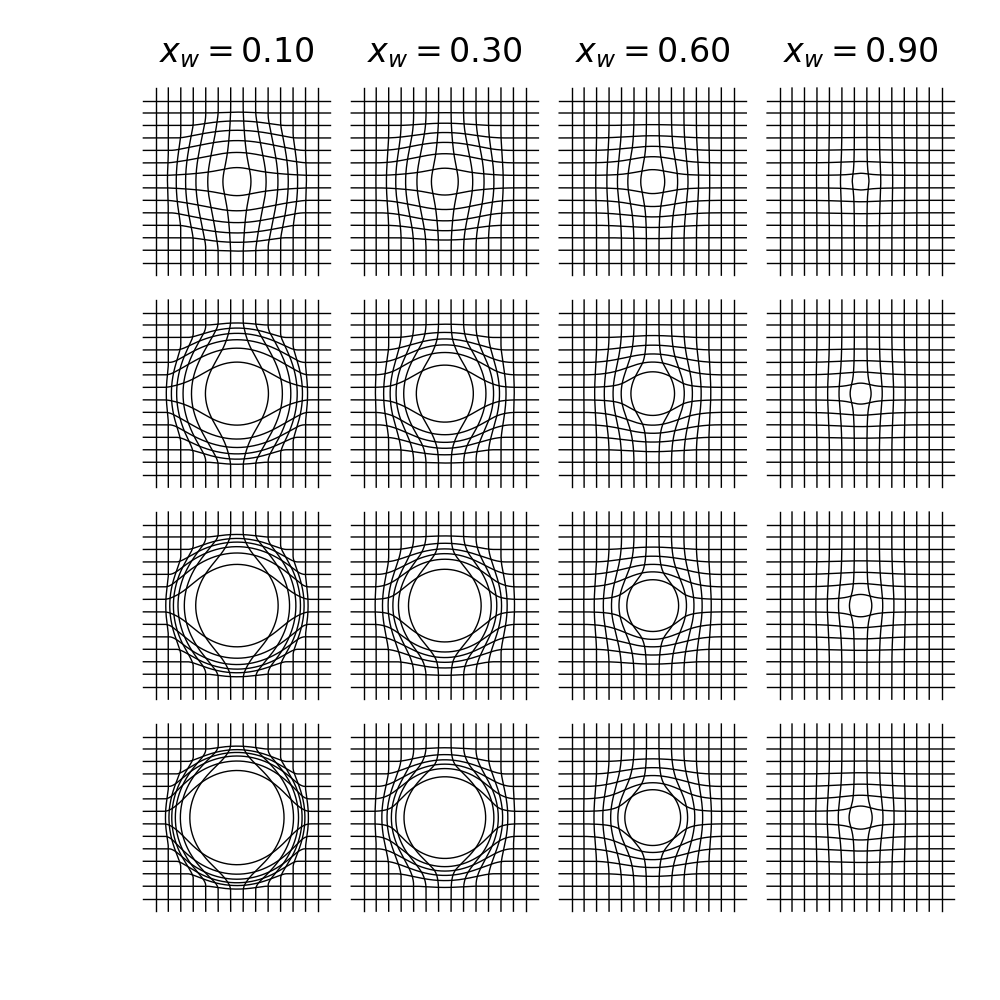

In [325]:
xws = [0.1,0.3,0.6,0.9]
ds = [1.5,3,4.5,6,]

N = 15
R = 0.4
dx = 1.0 / N
dir1 = np.linspace(0,1,1000)

fig, ax = pl.subplots(len(xws),len(ds),figsize=(5,5))
for i_d, d in enumerate(ds):
    for ixw, xw in enumerate(xws):
        X = np.array([[ xw**2/2, ((1-xw)**d)/d], [xw, -(1-xw)**(d-1)]])

        b = np.array([xw-1,1])
        A1, A2 = -np.linalg.inv(X).dot(b)

        x = np.linspace(0,1,100)
        xc = A1/2 * xw**2 + xw
        xc = 1 - xc

        
        for i in range(1,N):    
            dir2 = np.ones_like(dir1) * dx * i
            # x - direction
            new_x_1, new_y_1 = [], []
            new_x_2, new_y_2 = [], []
            for x, y in zip(dir1, dir2):
                _newx1, _newy1 = fisheye_radial((x,y), (0.5,0.5
                                                    ), R)
                _newx2, _newy2 = fisheye_radial((y,x), (0.5,0.5
                                                    ), R)
                new_x_1.append(_newx1)
                new_y_1.append(_newy1)
                new_x_2.append(_newx2)
                new_y_2.append(_newy2)

            ax[i_d,ixw].plot(new_x_1, new_y_1,'-k',lw=0.5)
            ax[i_d,ixw].plot(new_x_2, new_y_2,'-k',lw=0.5)

            ax[i_d,ixw].axis('square')
            ax[i_d,ixw].axis('off')
            if i_d == 0:
                ax[i_d,ixw].set_title('$x_w={:04.2f}$'.format(xw))
            if ixw == 0:
                ax[i_d,ixw].set_ylabel('$d={:04.1f}$'.format(d))
                
fig.tight_layout()
pl.subplots_adjust(wspace=0.01,hspace=0.01)
pl.show()

In [308]:
'$d={:0d}$'.format(d)

'$d=8$'